**Author:** @curbsideprophet  
**Date written:** 2022-01-03  
**Last updated:** 2022-02-17  
**Objective:** performance analytics visualization of Ergodex liquidity pool investments

**Example CSV header requirements:**  
date, lp\_pair1, lp\_pair2  
2021-11-17, 0.97906, 8.41  
2021-11-27, 1.07014, 7.54  
2021-11-28, 1.03666, 7.80

## Load modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from coingecko_fetch import *

## Onboard data

In [4]:
ergodex_data_raw = "../../../../Desktop/ergo_data/ergodex/data-erg_sigusd.csv"
edex_title = "ErgoDEX: ERG/SigUSD Liquidity Pair"

#ergodex_data_raw = "../../../Desktop/ergo_data/ergodex/data-erg_sigrsv.csv"
#edex_title = "ErgoDEX: ERG/SigRSV Liquidity Pair"

ergodex_data = pd.read_csv(ergodex_data_raw)
ergodex_data['date'] = pd.to_datetime(ergodex_data['date'])

## Grab daily price data

In [5]:
ergo = coingecko_fetch("ergo")
ergo.rename(columns = {'timestamp': 'date'}, inplace = True)

## Compute and join data frames

In [6]:
def ergodex_analytics(df):
    
    df_final = df.merge(ergo, how='left', on='date')

    ilp1 = df_final.lp_pair1[0]
    ilp2 = df_final.lp_pair2[0]
    ilp_ratio = ilp1 / ilp2
    ilp_price = df_final.price[0]

    df_final['ratio'] = df_final.lp_pair1 / df_final.lp_pair2
    df_final['lp_value1'] = df_final.lp_pair1 * df_final.price
    df_final['lp_value2'] = df_final.lp_pair2 * df_final.price * df_final.ratio
    df_final['lp_investment'] = df_final.lp_value1 + df_final.lp_value2
    df_final['hodl_instead'] = (ilp1 * df_final.price) + (ilp2 * df_final.price * ilp_ratio)
    df_final['erg_diff'] = 100 * (df_final.price / ilp_price - 1)
    df_final['lp_vs_hodl'] = 100 * (df_final.lp_investment / df_final.hodl_instead - 1)
    
    return(df_final)

ergodex = ergodex_analytics(ergodex_data)
ergodex_ax1 = ergodex[1:]

## Plot data

<Figure size 432x288 with 0 Axes>

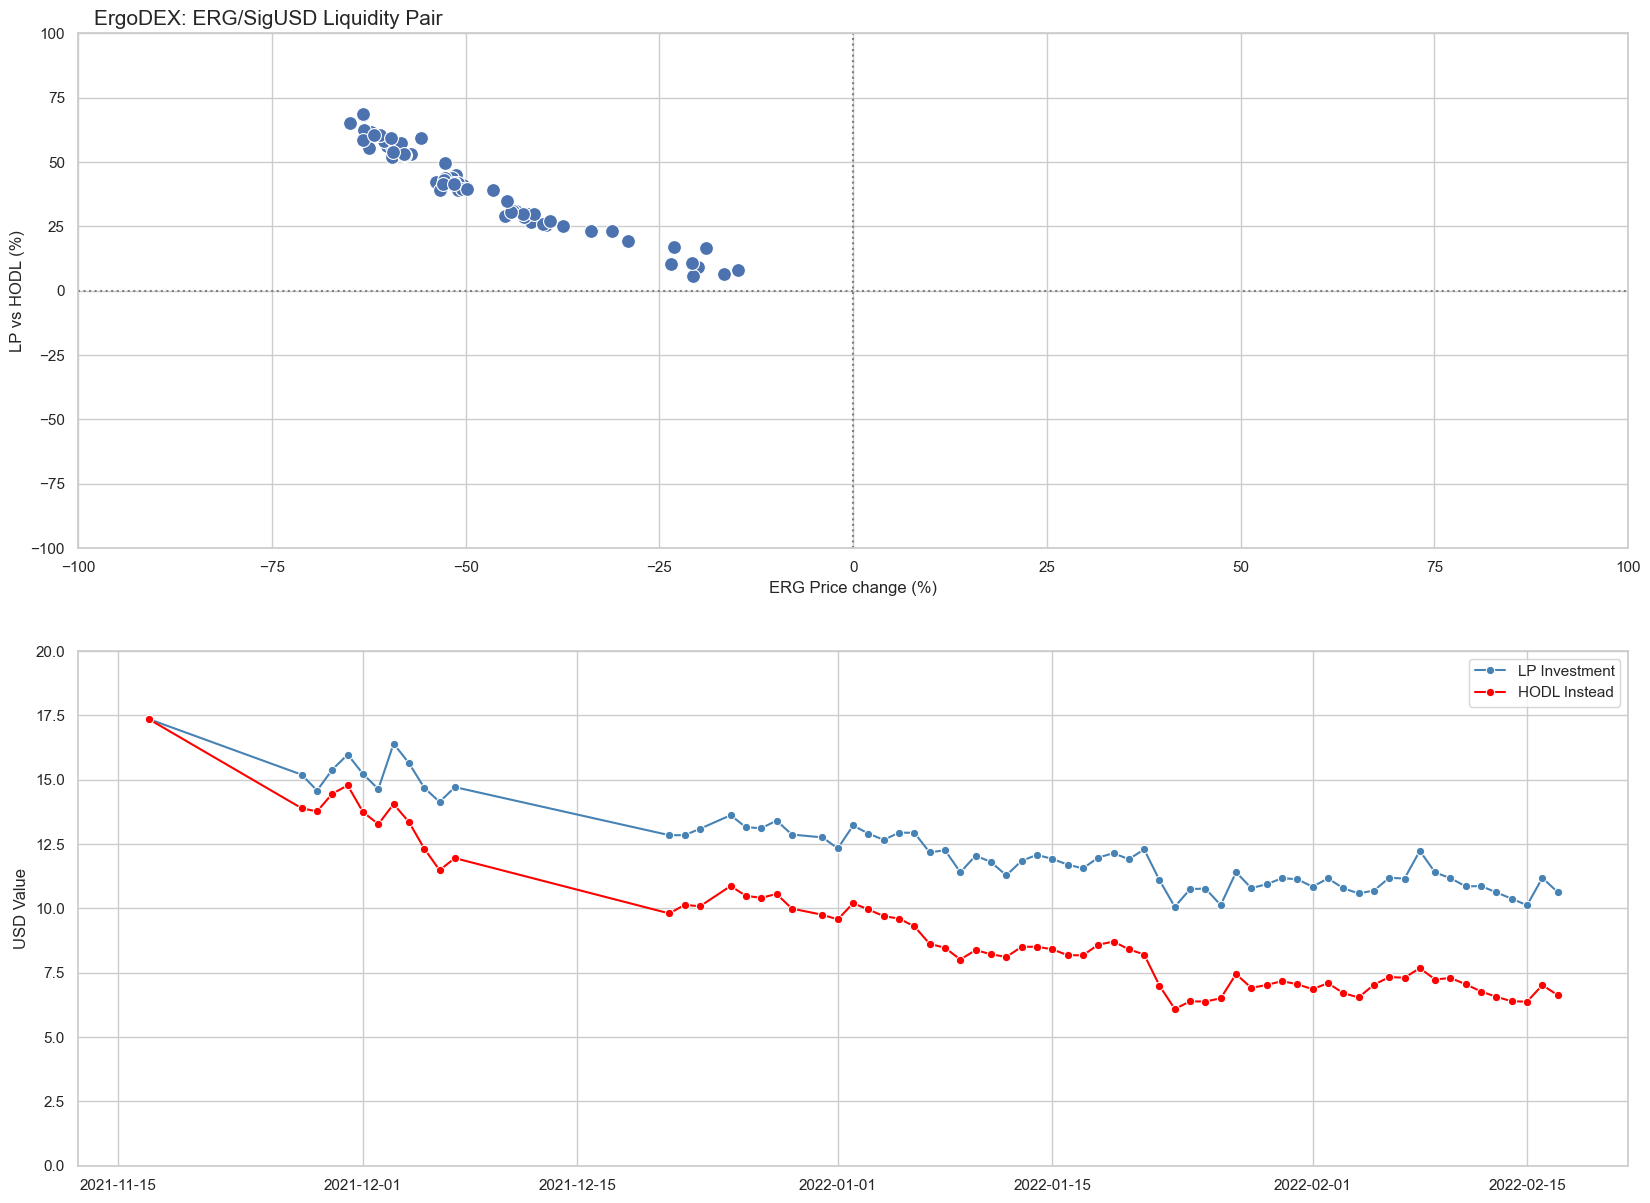

In [7]:
sns.set(style="whitegrid")

plt.clf()

plt.rcParams["figure.dpi"] = 100
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2, 1, 1) 
ax1 = sns.scatterplot(data=ergodex_ax1, x="erg_diff", y="lp_vs_hodl", s=100)
ax1.axhline(0, color='grey', linestyle=':')
ax1.axvline(0, color='grey', linestyle=':')
ax1.set_title(edex_title, x=0.01, y=1.00, fontsize=15, horizontalalignment='left')
ax1.set_xlabel("ERG Price change (%)")
ax1.set_ylabel("LP vs HODL (%)")
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.lineplot(data=ergodex, x="date", y="lp_investment", marker="o", color='steelblue', label="LP Investment")
ax2 = sns.lineplot(data=ergodex, x="date", y="hodl_instead", marker="o", color='red', label="HODL Instead")
ax2.set_xlabel("")
ax2.set_ylabel("USD Value")
ax2.set_ylim(0, 20)

plt.show()